In [2]:
import SimpleITK as sitk
import numpy as np
import torch

from helpers.general import torch2sitk, sitk2torch
from helpers.postprocess import eval_measure

In [5]:
ground_truth = torch.zeros(10,10,10)
ground_truth[1:4,1:4,1:4] = 1

prediction = torch.zeros(10,10,10)

measures = eval_measure(torch2sitk(ground_truth.byte()),
                       torch2sitk(prediction.byte()))

Exception thrown in SimpleITK HausdorffDistanceImageFilter_Execute: /tmp/SimpleITK-build/ITK-prefix/include/ITK-5.2/itkDirectedHausdorffDistanceImageFilter.hxx:145:
ITK ERROR: pixelcount is equal to 0


In [6]:
measures

{'dice': 0.0,
 'false_neg': 1.0,
 'false_pos': 1.7976931348623157e+308,
 'IoU': 0.0,
 'hausdorff_dist': nan}

In [7]:
measures2 = eval_measure(
                       torch2sitk(prediction.byte()),
                       torch2sitk(ground_truth.byte()),
            )

Exception thrown in SimpleITK HausdorffDistanceImageFilter_Execute: /tmp/SimpleITK-build/ITK-prefix/include/ITK-5.2/itkDirectedHausdorffDistanceImageFilter.hxx:145:
ITK ERROR: pixelcount is equal to 0


In [ ]:
measures2

{'dice': 0.0,
 'false_neg': 1.7976931348623157e+308,
 'false_pos': 1.0,
 'IoU': 0.0,
 'hausdorff_dist': nan}

In [1]:
import os
import sys

print('Number of arguments:', len(sys.argv), 'arguments.')
print('Argument List:', str(sys.argv))

kwargs = dict(arg.split("=") for arg in sys.argv if "=" in arg)
print(kwargs)

# print(os.environ)

environ{'BASH_ENV': '/cm/local/apps/environment-modules/4.4.1/init/bash',
        'BASH_FUNC__module_raw()': '() {  unset _mlshdbg;\n if [ "${MODULES_SILENT_SHELL_DEBUG:-0}" = \'1\' ]; then\n case "$-" in \n *v*x*)\n set +vx;\n _mlshdbg=\'vx\'\n ;;\n *v*)\n set +v;\n _mlshdbg=\'v\'\n ;;\n *x*)\n set +x;\n _mlshdbg=\'x\'\n ;;\n *)\n _mlshdbg=\'\'\n ;;\n esac;\n fi;\n unset _mlre _mlIFS;\n if [ -n "${IFS+x}" ]; then\n _mlIFS=$IFS;\n fi;\n IFS=\' \';\n for _mlv in ${MODULES_RUN_QUARANTINE:-};\n do\n if [ "${_mlv}" = "${_mlv##*[!A-Za-z0-9_]}" -a "${_mlv}" = "${_mlv#[0-9]}" ]; then\n if [ -n "`eval \'echo ${\'$_mlv\'+x}\'`" ]; then\n _mlre="${_mlre:-}${_mlv}_modquar=\'`eval \'echo ${\'$_mlv\'}\'`\' ";\n fi;\n _mlrv="MODULES_RUNENV_${_mlv}";\n _mlre="${_mlre:-}${_mlv}=\'`eval \'echo ${\'$_mlrv\':-}\'`\' ";\n fi;\n done;\n if [ -n "${_mlre:-}" ]; then\n eval `eval ${_mlre}/usr/bin/tclsh /cm/local/apps/environment-modules/4.4.1/libexec/modulecmd.tcl bash \'"$@"\'`;\n else\n eval `/usr/bin/tcls

In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create binary mask w/ rectangle
sz   = (16, 16, 16)
bbox = (5,10,7,10,9,12) 

a,b,c,d,e,f = bbox
mk   = torch.zeros(sz)
mk[a:b, c:d, e:f] = 1

# compute centroid
def get_centroid(mk):
    indices = torch.nonzero(mk)
    centroid = indices.float().mean(dim=0)
    return centroid
    
centroid = get_centroid(mk)

In [3]:
from monai.transforms import Affine

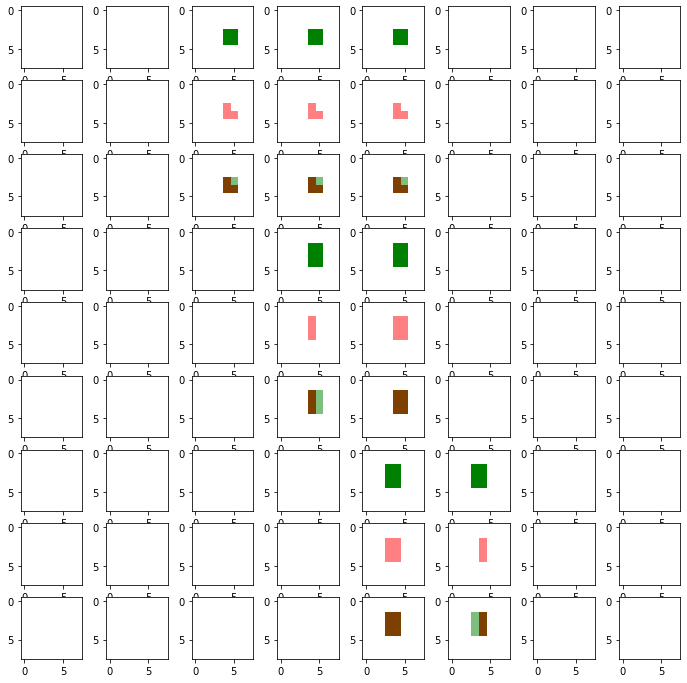

In [63]:
sz   = (8,8,8)

# 2-4, 3-4, 4-5
bbox = (2,5,3,5,4,6) 

a,b,c,d,e,f = bbox
mk   = torch.zeros(sz)
mk[a:b, c:d, e:f] = 1

monai_aff = Affine(
    rotate_params=(np.pi/6,0,0), 
    shear_params=None, 
    translate_params=(0,0,0),
    scale_params=None, 
    spatial_size=None, 
    mode='nearest', 
    padding_mode='zeros', 
    as_tensor_output=False, 
    device=None, 
    image_only=False
)

monai_aff_mk, monai_aff_matrix = monai_aff(mk)

from matplotlib import colors
bin_cmap1  = colors.ListedColormap(['white', 'green'])
bin_cmap2  = colors.ListedColormap(['white', 'red'])

_, axes = plt.subplots(9,8, figsize=(12,12))
for i in range(8):
    axes[0,i].imshow(mk[i,:,:], cmap=bin_cmap1)
    axes[1,i].imshow(monai_aff_mk[i,:,:], cmap=bin_cmap2, alpha=0.5)
    
    axes[2,i].imshow(mk[i,:,:], cmap=bin_cmap1)
    axes[2,i].imshow(monai_aff_mk[i,:,:], cmap=bin_cmap2, alpha=0.5)
    
    axes[3,i].imshow(mk[:,i,:], cmap=bin_cmap1)
    axes[4,i].imshow(monai_aff_mk[:,i,:], cmap=bin_cmap2, alpha=0.5)
    
    axes[5,i].imshow(mk[:,i,:], cmap=bin_cmap1)
    axes[5,i].imshow(monai_aff_mk[:,i,:], cmap=bin_cmap2, alpha=0.5)
    
    axes[6,i].imshow(mk[:,:,i], cmap=bin_cmap1)
    axes[7,i].imshow(monai_aff_mk[:,:,i], cmap=bin_cmap2, alpha=0.5)
    
    axes[8,i].imshow(mk[:,:,i], cmap=bin_cmap1)
    axes[8,i].imshow(monai_aff_mk[:,:,i], cmap=bin_cmap2, alpha=0.5)
    
plt.show()

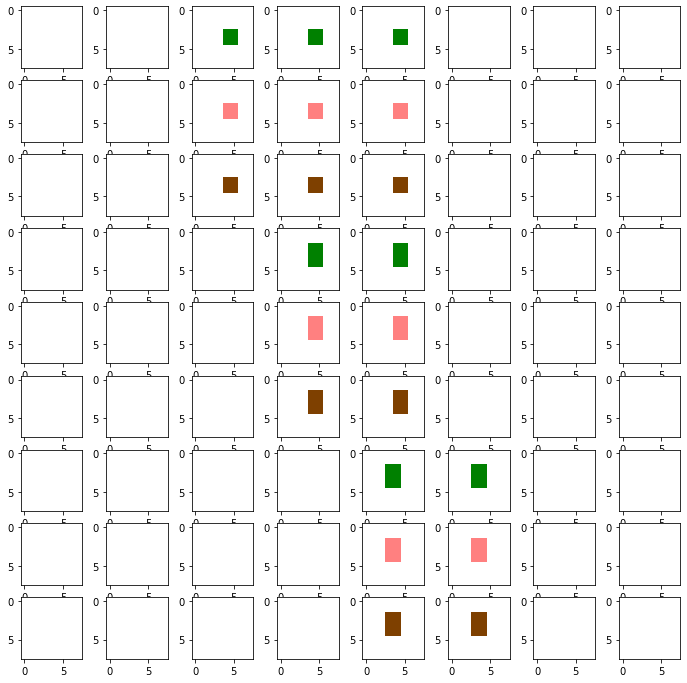

In [68]:
sz   = (8,8,8)

# 2-4, 3-4, 4-5
bbox = (2,5,3,5,4,6) 

a,b,c,d,e,f = bbox
mk   = torch.zeros(sz)
mk[a:b, c:d, e:f] = 1

# affine rotate mask
D,H,W = mk.size()
B = 1
affine_matrix = (torch.eye(3,4).unsqueeze(0) + torch.randn(1, 3, 4) * 0.05)
meshgrid      = F.affine_grid(affine_matrix,torch.Size((B,1,D,H,W)), align_corners=False)
aff_mk = F.grid_sample(mk.unsqueeze(0).unsqueeze(0).float(), meshgrid, mode='nearest', align_corners=False).long().squeeze()


from matplotlib import colors
bin_cmap1  = colors.ListedColormap(['white', 'green'])
bin_cmap2  = colors.ListedColormap(['white', 'red'])

_, axes = plt.subplots(9,8, figsize=(12,12))
for i in range(8):
    axes[0,i].imshow(mk[i,:,:], cmap=bin_cmap1)
    axes[1,i].imshow(aff_mk[i,:,:], cmap=bin_cmap2, alpha=0.5)
    
    axes[2,i].imshow(mk[i,:,:], cmap=bin_cmap1)
    axes[2,i].imshow(aff_mk[i,:,:], cmap=bin_cmap2, alpha=0.5)
    
    axes[3,i].imshow(mk[:,i,:], cmap=bin_cmap1)
    axes[4,i].imshow(aff_mk[:,i,:], cmap=bin_cmap2, alpha=0.5)
    
    axes[5,i].imshow(mk[:,i,:], cmap=bin_cmap1)
    axes[5,i].imshow(aff_mk[:,i,:], cmap=bin_cmap2, alpha=0.5)
    
    axes[6,i].imshow(mk[:,:,i], cmap=bin_cmap1)
    axes[7,i].imshow(aff_mk[:,:,i], cmap=bin_cmap2, alpha=0.5)
    
    axes[8,i].imshow(mk[:,:,i], cmap=bin_cmap1)
    axes[8,i].imshow(aff_mk[:,:,i], cmap=bin_cmap2, alpha=0.5)
    
plt.show()

In [38]:
monai_aff_mk, monai_aff_matrix = monai_aff(mk)

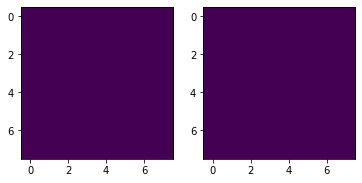

In [33]:
_, axes = plt.subplots(1,2)
axes[0].imshow(mk[3])
axes[1].imshow(monai_aff_mk[3])

In [29]:
# affine rotate mask
D,H,W = mk.size()
B = 1
affine_matrix = (torch.eye(3,4).unsqueeze(0) + torch.randn(1, 3, 4) * 0.5)
meshgrid      = F.affine_grid(affine_matrix,torch.Size((B,1,D,H,W)), align_corners=False)
aff_mk = F.grid_sample(mk.unsqueeze(0).unsqueeze(0).float(), meshgrid, mode='nearest', align_corners=False).long().squeeze()

# get coords
def get_aff_coord(coord, meshgrid=meshgrid):
    c1,c2,c3 = meshgrid.squeeze()[coord[0], coord[1], coord[2]] *7.5 + 7.5
    return c3,c2,c1

# coords imin imax jmin jmax kmin kmax
i1, i2, j1, j2, k1, k2 = bbox

# exclusive
i2 -= 1
j2 -= 1
k2 -= 1

coord1 = (i1, j1, k1) #j1: i1,k1. #k1: i1,j1
coord2 = (i1, j1, k2) #j1: i1,k2. 
coord3 = (i1, j2, k1)  #k1: i1,j2
coord4 = (i1, j2, k2)
coord5 = (i2, j1, k1) #j1: i2,k1. #k1: i2,j1
coord6 = (i2, j1, k2) #j1: i2,k2
coord7 = (i2, j2, k1) #k1: i2,j2
coord8 = (i2, j2, k2)

# affine
aff_coord1 = get_aff_coord(coord1)
aff_coord2 = get_aff_coord(coord2)
aff_coord3 = get_aff_coord(coord3)
aff_coord4 = get_aff_coord(coord4)
aff_coord5 = get_aff_coord(coord5)
aff_coord6 = get_aff_coord(coord6)
aff_coord7 = get_aff_coord(coord7)
aff_coord8 = get_aff_coord(coord8)

# diff
centroid     = get_centroid(mk)
aff_centroid = get_centroid(aff_mk)

print("Centroid, Aff centroid")
print(centroid, aff_centroid)

Centroid, Aff centroid
tensor([ 7.,  8., 10.]) tensor([ 1.5870, 12.5870, 13.0000])


In [124]:
# Gt

aff_coords = (aff_coord1, aff_coord2, aff_coord3, aff_coord4, aff_coord5, aff_coord6, aff_coord7, aff_coord8)
old_coords = (coord1, coord2, coord3, coord4, coord5, coord6, coord7, coord8)

test   = torch.zeros(sz)
#test[a:b, c:d, e:f] = 1
for i,coord in enumerate(old_coords):
    test[coord[0], coord[1], coord[2]] = (i+2)*100
    
# apply aff
aff_test = F.grid_sample(test.unsqueeze(0).unsqueeze(0).float(), meshgrid, mode='nearest', align_corners=False).squeeze()
expected_new_coords = []
for i in range(8):
    print(i)
    tried = torch.logical_and(aff_test > (i+1)*100, aff_test <= (i+2)*100).nonzero(as_tuple=False)
    print(len(tried))

0
4
1
4
2
5
3
4
4
4
5
5
6
5
7
6


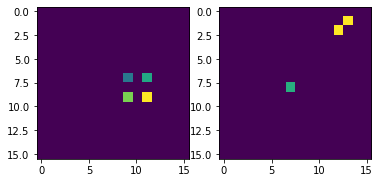

In [125]:
_, axes = plt.subplots(1,2)
axes[0].imshow(test[5])
axes[1].imshow(aff_test[5])

In [126]:
for i in range(8):
    print(aff_coords[i])
    print(expected_new_coords[i])
    print(old_coords[i]); print()

(tensor(5.9554), tensor(8.9281), tensor(11.2162))


IndexError: list index out of range

In [127]:
test[5]

tensor([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 200.,   0., 300.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,

In [128]:
aff_test[5]

tensor([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0., 800.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         800.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0., 500.,   0.,   0.,   0.,   0.,

In [110]:
aff_coord3 # i = 4 => between 5 and 6

(tensor(4.8611), tensor(9.1021), tensor(12.8964))

In [107]:
aff_test[6].long()

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 1, 3, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [26]:
expected_new_coords

[tensor([5, 6, 9]),
 tensor([ 5,  6, 11]),
 tensor([5, 8, 9]),
 tensor([ 5,  8, 11]),
 tensor([9, 7, 9]),
 tensor([ 9,  7, 11]),
 tensor([9, 9, 9])]

In [20]:
old_coords

((5, 7, 9),
 (5, 7, 11),
 (5, 9, 9),
 (5, 9, 11),
 (9, 7, 9),
 (9, 7, 11),
 (9, 9, 9),
 (9, 9, 11))

In [83]:
# Plot

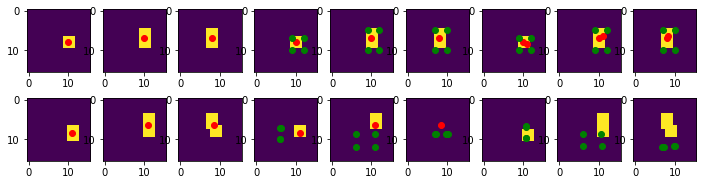

In [108]:
_, ax = plt.subplots(2,9, figsize=(12,3))

mid0 = (a+b)//2
mid1 = (c+d)//2
mid2 = (e+f)//2

# row 1 = original

# middle slices + centroid in red
ax[0, 0].imshow(mk[mid0,:,:]); ax[0,0].plot(centroid[2], centroid[1], 'ro')
ax[0, 1].imshow(mk[:,mid1,:]); ax[0,1].plot(centroid[2], centroid[0], 'ro')
ax[0, 2].imshow(mk[:,:,mid2]); ax[0,2].plot(centroid[1], centroid[0], 'ro')

# min edge + centroid in red + 4 lower coords in green
ax[0, 3].imshow(mk[a,:,:]);    ax[0,3].plot(centroid[2], centroid[1], 'ro')
ax[0, 4].imshow(mk[:,c,:]);    ax[0,4].plot(centroid[2], centroid[0], 'ro')
ax[0, 5].imshow(mk[:,:,e]);    ax[0,5].plot(centroid[1], centroid[0], 'ro')

# axis 0: j1,k1, j1,k2, j2,k1, j2,k2
for coord in (coord1, coord2, coord3, coord4): ax[0,3].plot(coord[2], coord[1], 'go')

# axis 1: i1,k1, i1,k2, i2,k1, i2,k2
for coord in (coord1, coord2, coord5, coord6): ax[0,4].plot(coord[2], coord[0], 'go')

# axis 2: i1,j1 i1,j2 i2,j1 i2j2
for coord in (coord1, coord3, coord5, coord7): ax[0,5].plot(coord[1], coord[0], 'go')
    
# max edge
ax[0, 6].imshow(mk[b-1,:,:]); ax[0,6].plot(centroid[2], centroid[1], 'ro')
ax[0, 7].imshow(mk[:,d-1,:]); ax[0,7].plot(centroid[2], centroid[0], 'ro')
ax[0, 8].imshow(mk[:,:,f-1]); ax[0,8].plot(centroid[1], centroid[0], 'ro')

# plot coords max edge
for coord in (coord5, coord6, coord7, coord8): ax[0,6].plot(coord[2], coord[1], 'go')
for coord in (coord3, coord4, coord7, coord8): ax[0,7].plot(coord[2], coord[0], 'go')
for coord in (coord2, coord4, coord6, coord8): ax[0,8].plot(coord[1], coord[0], 'go')
    
    
# row 2 = rotated
ax[1, 0].imshow(aff_mk[mid0,:,:]); ax[1,0].plot(aff_centroid[2], aff_centroid[1], 'ro')
ax[1, 1].imshow(aff_mk[:,mid1,:]); ax[1,1].plot(aff_centroid[2], aff_centroid[0], 'ro')
ax[1, 2].imshow(aff_mk[:,:,mid2]); ax[1,2].plot(aff_centroid[1], aff_centroid[0], 'ro')

# min edge
ax[1, 3].imshow(aff_mk[a,:,:]);    ax[1,3].plot(aff_centroid[2], aff_centroid[1], 'ro')
ax[1, 4].imshow(aff_mk[:,c,:]);    ax[1,4].plot(aff_centroid[2], aff_centroid[0], 'ro')
ax[1, 5].imshow(aff_mk[:,:,e]);    ax[1,5].plot(aff_centroid[1], aff_centroid[0], 'ro')

# max edge
ax[1, 6].imshow(aff_mk[b-1,:,:]); ax[0,6].plot(aff_centroid[2], aff_centroid[1], 'ro')
ax[1, 7].imshow(aff_mk[:,d-1,:]); ax[0,7].plot(aff_centroid[2], aff_centroid[0], 'ro')
ax[1, 8].imshow(aff_mk[:,:,f-1]); ax[0,8].plot(aff_centroid[1], aff_centroid[0], 'ro')

# plot coords min edge
for coord in (aff_coord1, aff_coord2, aff_coord3, aff_coord4): ax[1,3].plot(coord[2], coord[1], 'go')
for coord in (aff_coord1, aff_coord2, aff_coord5, aff_coord6): ax[1,4].plot(coord[2], coord[0], 'go')
for coord in (aff_coord1, aff_coord3, aff_coord5, aff_coord7): ax[1,5].plot(coord[1], coord[0], 'go')
    
# plot coords max edge
for coord in (aff_coord5, aff_coord6, aff_coord7, aff_coord8): ax[1,6].plot(coord[2], coord[1], 'go')
for coord in (aff_coord3, aff_coord4, aff_coord7, aff_coord8): ax[1,7].plot(coord[2], coord[0], 'go')
for coord in (aff_coord2, aff_coord4, aff_coord6, aff_coord8): ax[1,8].plot(coord[1], coord[0], 'go')
    

In [95]:
bbox

(5, 10, 7, 10, 9, 12)

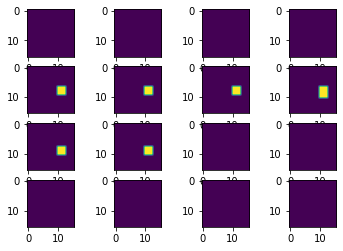

In [106]:
_, axes = plt.subplots(4,4)
row = 0
col = 0
for i in range(16):
    axes[row,col].imshow(aff_mk[i,:,:])
    col += 1
    if col % 4 == 0:
        row += 1
        col = 0

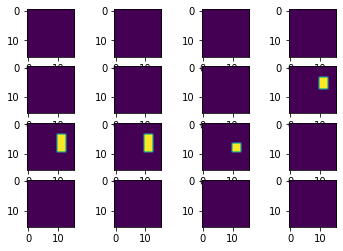

In [107]:
_, axes = plt.subplots(4,4)
row = 0
col = 0
for i in range(16):
    axes[row,col].imshow(aff_mk[:,i,:])
    col += 1
    if col % 4 == 0:
        row += 1
        col = 0

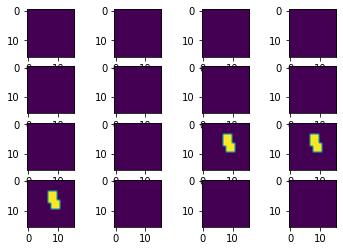

In [105]:
_, axes = plt.subplots(4,4)
row = 0
col = 0
for i in range(16):
    axes[row,col].imshow(aff_mk[:,:,i])
    col += 1
    if col % 4 == 0:
        row += 1
        col = 0

In [91]:
torch.tensor([5,7,9])*8 + 8
(torch.tensor([78.4133, 65.3135, 56.9544])-8)/8

tensor([8.8017, 7.1642, 6.1193])

In [92]:
aff_coords = (aff_coord1, aff_coord2, aff_coord3, aff_coord4, aff_coord5, aff_coord6, aff_coord7, aff_coord8)
old_coords = (coord1, coord2, coord3, coord4, coord5, coord6, coord7, coord8)
for i in range(8):
    print(i, old_coords[i], aff_coords[i])

0 (5, 7, 9) tensor([8.8017, 7.1642, 6.1193])
1 (5, 7, 12) tensor([11.9178,  7.1991,  6.1883])
2 (5, 10, 9) tensor([ 8.6205, 10.0649,  5.9522])
3 (5, 10, 12) tensor([11.7366, 10.0998,  6.0212])
4 (10, 7, 9) tensor([ 8.7707,  6.7928, 10.7820])
5 (10, 7, 12) tensor([11.8868,  6.8277, 10.8510])
6 (10, 10, 9) tensor([ 8.5895,  9.6935, 10.6149])
7 (10, 10, 12) tensor([11.7056,  9.7284, 10.6839])


# Transform

In [ ]:
class CentroidLoss(nn.Module):
    def __init__(self):
        super(CentroidLoss, self).__init__()
        
    def forward(self, rendered_silhouette, original_silhouette):
        rendered_sil_indices = torch.nonzero(rendered_silhouette)
        rendered_sil_centroid = torch.Tensor.float(rendered_sil_indices).mean(dim=0)

        original_sil_indices = torch.nonzero(original_silhouette)
        original_sil_centroid = torch.Tensor.float(original_sil_indices).mean(dim=0)

        centroid_dist = ((rendered_sil_centroid[0] - original_sil_centroid[0]) ** 2 \
                        + (rendered_sil_centroid[0] - original_sil_centroid[0]) ** 2 ) \
                        / (rendered_silhouette.shape[0]*rendered_silhouette.shape[1])

        return centroid_dist
    
    

In [ ]:
# comp